In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [2]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Correlation_bw_triplets
imp.reload( Correlation_bw_triplets)
from  Correlation_bw_triplets import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

from Exclusion import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *


In [3]:
def process_model_rl(model = 'ambi_both', which_trial = 'all'):
    
    kwargs = {}
    
    if model == 'ambi_both':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
    elif model == 'ambi_present':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
    elif model == 'ambi_level':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

    # for gain
    kwargs['task']='gain'

    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_g, model_param_df_g=(all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial))

    # for loss
    kwargs['task']='loss'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # for shock
    kwargs['task']='shock'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
    model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # stacking all the df's for a single model 
    model_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
    model_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))
    
    #reverse beta when necessary
    # magnitude
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'mag_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock')& (model_param_df.parameter == 'mag_diff_rl'),'beta']*-1
    # probability
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    
    return(model_param_df, model_summary_df)

## Model 1 - Ambiguity Presence

### All trials

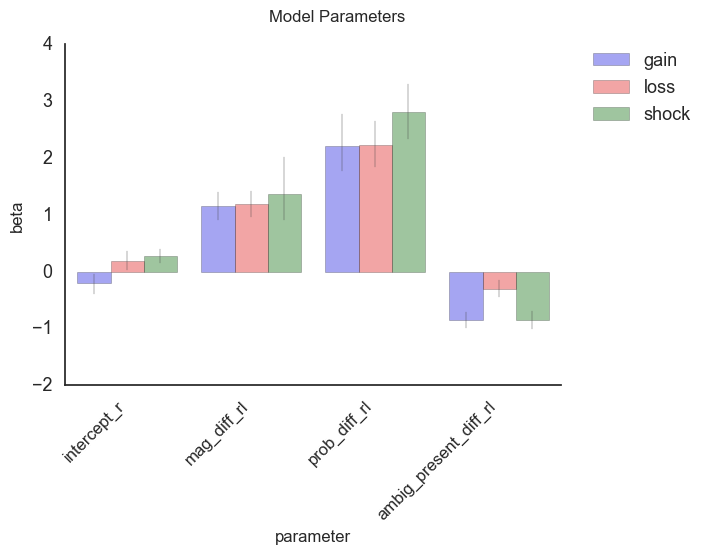

In [4]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'all')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [5]:
model_param_df_present_all = model_param_df

### First trials¶

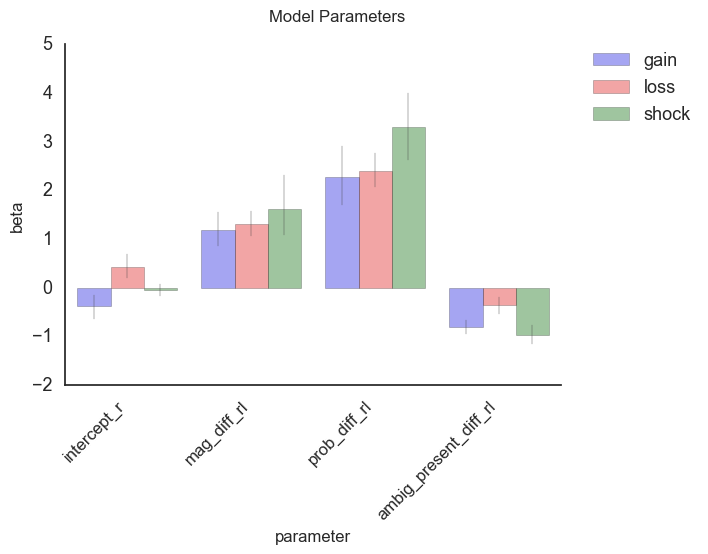

In [6]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'firstTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [7]:
model_param_df_present_first = model_param_df

### Late Trials

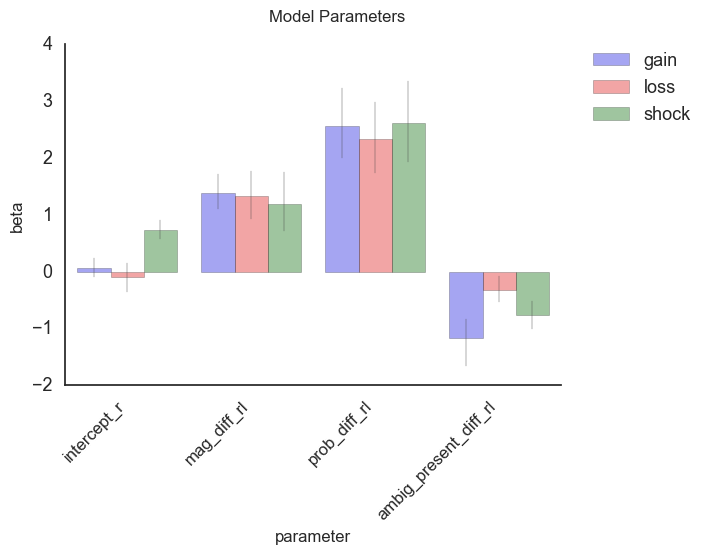

In [8]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'lateTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [9]:
model_param_df_present_late = model_param_df

## Model 2 - Ambiguity Level

### All trials

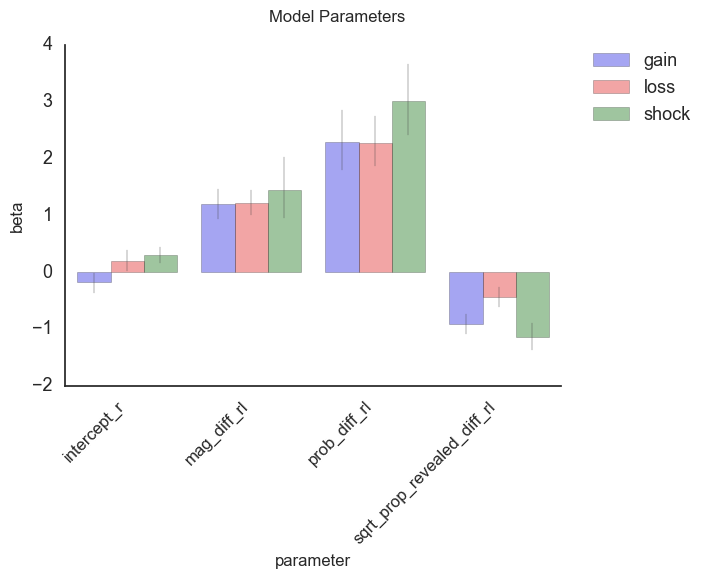

In [10]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'all')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [11]:
model_param_df_level_all = model_param_df

### First Trials

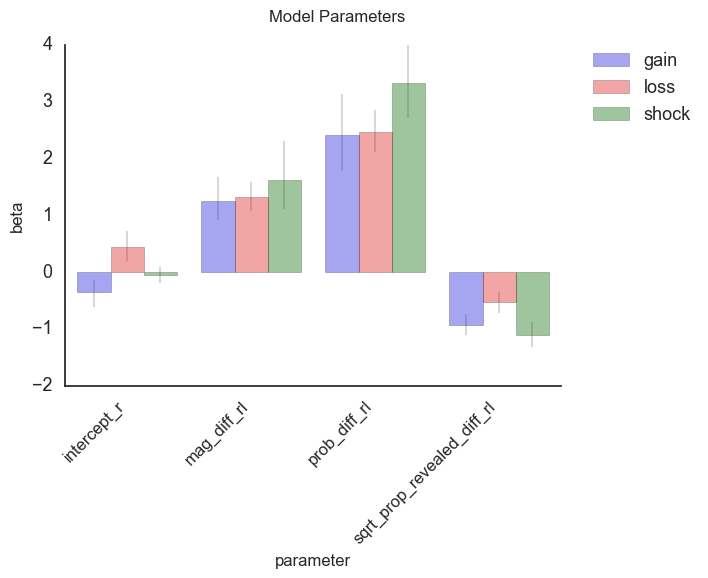

In [12]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'firstTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [13]:
model_param_df_level_first = model_param_df

### Late Trials

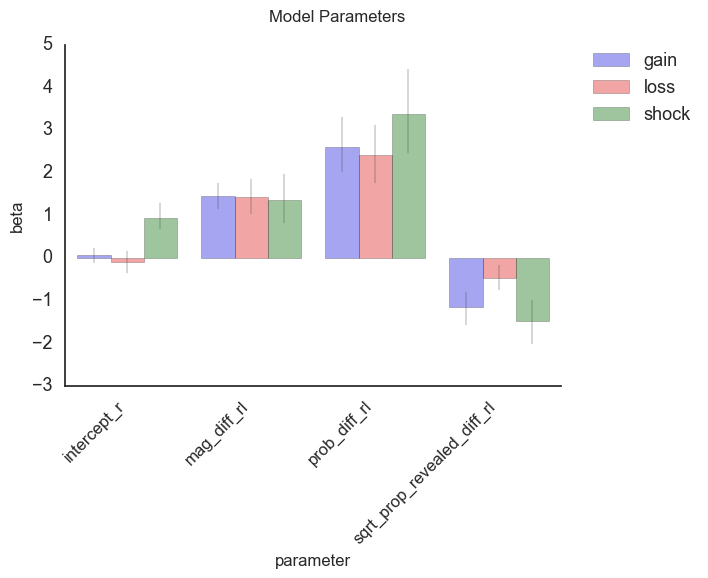

In [14]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'lateTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [15]:
model_param_df_level_late = model_param_df

## Correlations between early and late trial parameters (AmbiLevel)

In [40]:
triplet_intercept_first = triplet_rl(model_param_df_level_first, 'intercept_r')
triplet_magdiff_first = triplet_rl(model_param_df_level_first, 'mag_diff_rl')
triplet_probdiff_first = triplet_rl(model_param_df_level_first, 'prob_diff_rl')
triplet_ambiguityLevel_first = triplet_rl(model_param_df_level_first, 'sqrt_prop_revealed_diff_rl')

In [41]:
triplet_intercept_late = triplet_rl(model_param_df_level_late, 'intercept_r')
triplet_magdiff_late = triplet_rl(model_param_df_level_late, 'mag_diff_rl')
triplet_probdiff_late = triplet_rl(model_param_df_level_late, 'prob_diff_rl')
triplet_ambiguityLevel_late = triplet_rl(model_param_df_level_late, 'sqrt_prop_revealed_diff_rl')

In [42]:
triplet_intercept_first = triplet_intercept_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})
triplet_magdiff_first = triplet_magdiff_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})
triplet_probdiff_first = triplet_probdiff_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})
triplet_ambiguityLevel_first = triplet_ambiguityLevel_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})


In [43]:
triplet_intercept_late = triplet_intercept_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})
triplet_magdiff_late = triplet_magdiff_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})
triplet_probdiff_late = triplet_probdiff_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})
triplet_ambiguityLevel_late = triplet_ambiguityLevel_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})


In [44]:
triplet_intercept = triplet_intercept_first.merge(triplet_intercept_late, 'left')
triplet_magdiff = triplet_magdiff_first.merge(triplet_magdiff_late, 'left')
triplet_probdiff = triplet_probdiff_first.merge(triplet_probdiff_late, 'left')
triplet_ambiguityLevel = triplet_ambiguityLevel_first.merge(triplet_ambiguityLevel_late, 'left')

In [55]:
def plotTriplet(triplet_df, parameter):
    #yerr = triplet_df['se_shock'].as_matrix()
    #xerr = triplet_df['se_gain'].as_matrix()
    fig,axes = plt.subplots(1,3,figsize=(12,4),sharey=True,sharex=True)
    axes[0].scatter(triplet_df['gain123'],triplet_df['gain45'])
    #axes[0].errorbar(triplet_df['gain'],triplet_df['shock'], xerr=xerr, yerr=yerr)
    axes[0].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[0].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    #axes[0].plot([0, 1], [0, 1], transform=axes[0].transAxes, linewidth = 0.5)


    axes[0].set_xlabel('beta(gain123)')
    axes[0].set_ylabel('beta(gain45)')
    r,p=spearmanr(triplet_df['gain123'],triplet_df['gain45'])
    axes[0].set_title('gain123/gain45 r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    #axes[0].set_xlim([-4,4])
    #axes[0].set_ylim([-4,4])
    axes[0].set_aspect('equal')

    axes[1].scatter(triplet_df['loss123'],triplet_df['loss45'])
    axes[1].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[1].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    #axes[1].plot([0, 1], [0, 1], transform=axes[1].transAxes, linewidth = 0.5)

    axes[1].set_xlabel('beta(loss123)')
    axes[1].set_ylabel('beta(loss45)')
    r,p=spearmanr(triplet_df['loss123'],triplet_df['loss45'])
    axes[1].set_title('loss123/loss45 r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    axes[1].set_aspect('equal')

    axes[2].scatter(triplet_df['shock123'],triplet_df['shock45'])
    axes[2].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[2].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    #axes[2].plot([0, 1], [0, 1], transform=axes[2].transAxes, linewidth = 0.5)

    axes[2].set_xlabel('beta(shock123)')
    axes[2].set_ylabel('beta(shock45)')
    r,p=spearmanr(triplet_df['shock123'],triplet_df['shock45'])
    axes[2].set_title('shock123/shock45 r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    axes[2].set_aspect('equal')
    sns.despine()

    fig.suptitle(parameter)
    fig.subplots_adjust(top=0.77)

    return(fig)

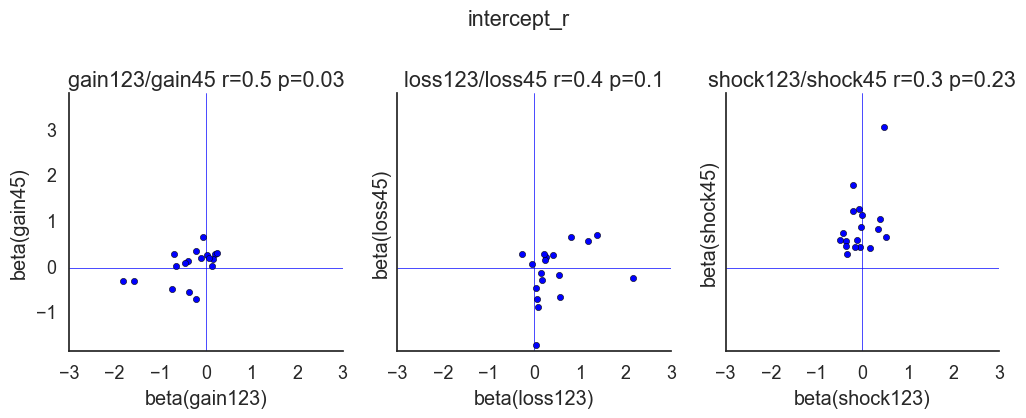

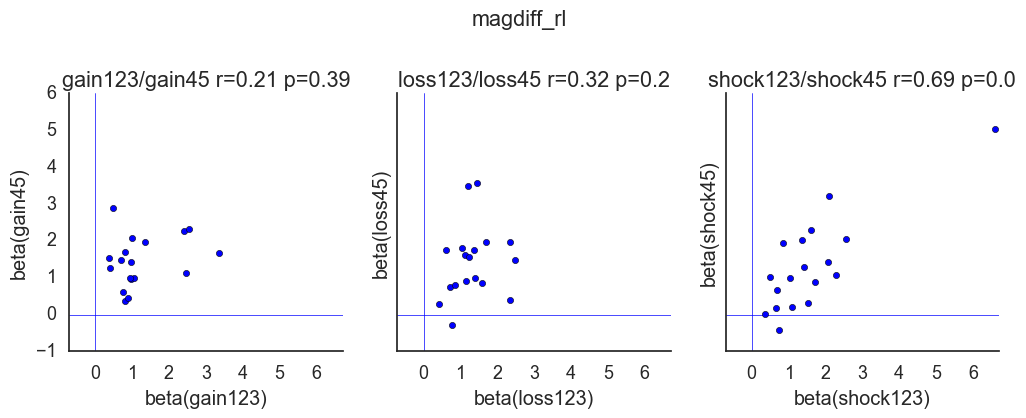

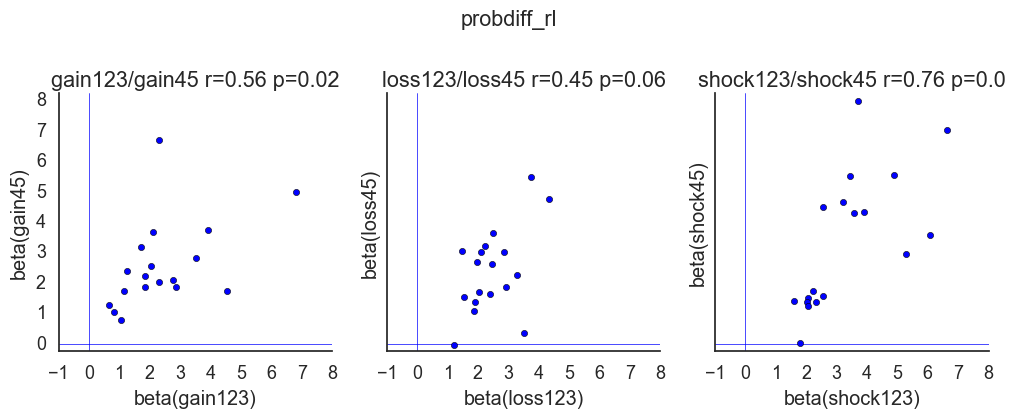

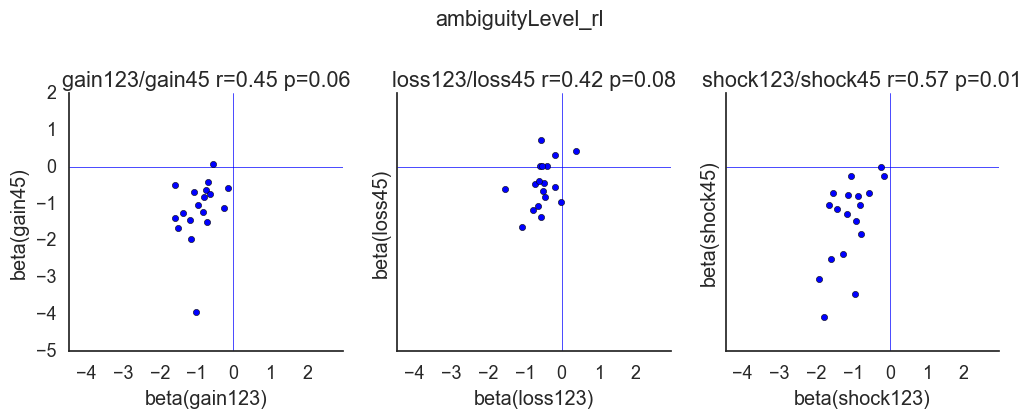

In [56]:
plotTriplet(triplet_intercept, 'intercept_r')
plotTriplet(triplet_magdiff, 'magdiff_rl')
plotTriplet(triplet_probdiff, 'probdiff_rl')
f = plotTriplet(triplet_ambiguityLevel, 'ambiguityLevel_rl')



## Bar graphs reorganized

In [60]:
model_param_df_level_first.head()

,MID,parameter,beta,se,task,trials
1,vp06,intercept_r,-0.271558,0.259564166918,loss,early
2,vp06,mag_diff_rl,2.345185,0.5504012442,loss,early
3,vp06,prob_diff_rl,1.207315,0.404083281029,loss,early
4,vp06,sqrt_prop_revealed_diff_rl,-0.191935,0.258498744083,loss,early
5,vp07,intercept_r,0.542111,0.288711118077,loss,early


In [59]:
model_param_df_level_first['trials'] = 'early'

In [61]:
model_param_df_level_late['trials'] = 'late'

In [64]:
model = model_param_df_level_first.append(model_param_df_level_late)

In [80]:
Gain = model.loc[(model['task'] == 'gain')]
Loss = model.loc[(model['task'] == 'loss')]
Shock = model.loc[(model['task'] == 'shock')]

In [86]:
def plot_params_rl(df,stripplot=False,outlier_cutoff=None, Task = 'Gain'):
    
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    matplotlib.rc("font", family="Times New Roman")
    sns.set_context('talk')
    sns.set_style('white',{'figure.facecolor':'white'})


    if outlier_cutoff is not None:
        df = df[(df.beta>-1.0*outlier_cutoff)&(df.beta<outlier_cutoff)]

    axis = sns.barplot(x='parameter',y='beta',hue='trials', errwidth=0.5, data=df,ci=68, alpha=0.4)

    if stripplot:
        sns.stripplot(x="parameter", y="beta",hue='trials', data=df,alpha=0.2,jitter=True);

    current_palette=sns.color_palette()
    fig = plt.gcf()
    fig.suptitle(Task, fontsize=12,x=0.55)
    sns.despine(ax=axis)
    axis.set_ylabel('beta',fontsize=12)
    axis.set_xlabel('trials',fontsize=12)
    axis.set_xticklabels(df.parameter.unique(),rotation=45,fontsize=12,ha='right')
    axis = plt.gca()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    # change name if needed
    #xlabels = axis.get_xticklabels()

    #fig.suptitle('')
    #axis.set_title('Model Parameters (Across all Subjects)')
    #axis.set_xlabel('Parameter')
    #axis.set_ylabel('Group Regression Coefficients \n (Probability Choosing Ambig)')
    #plt.tight_layout()
    return(fig)


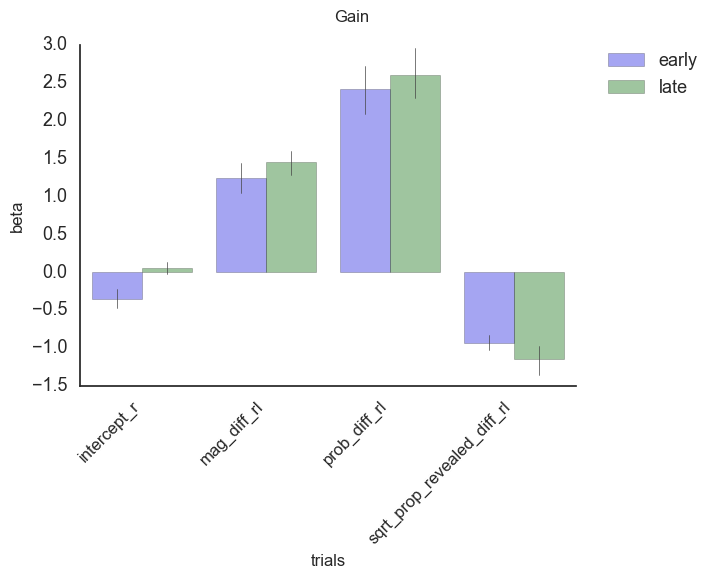

In [87]:
f = plot_params_rl(Gain, Task = 'Gain')


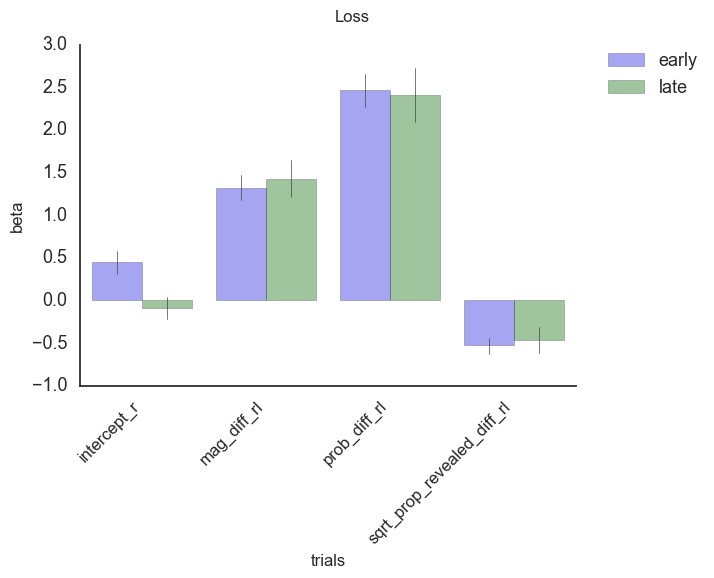

In [88]:
f = plot_params_rl(Loss, Task = 'Loss')


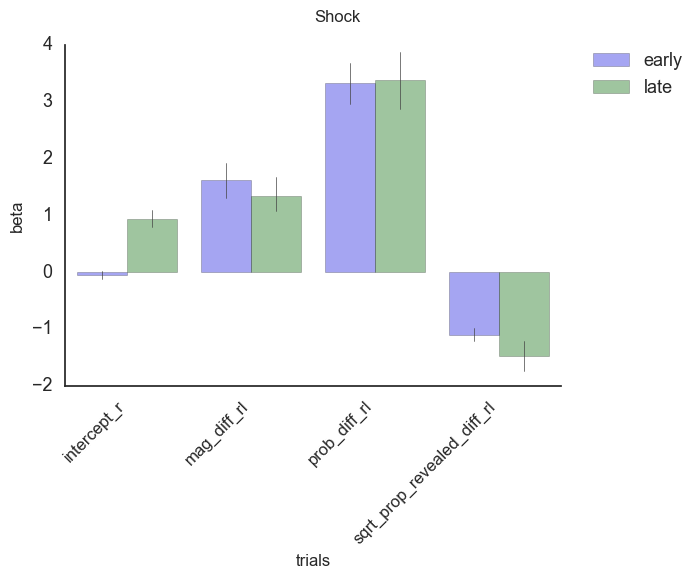

In [89]:
f = plot_params_rl(Shock, Task = 'Shock')